In [2]:
#pip install ggplot

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [9]:
#%% import dataset 
data = pd.read_csv("/Users/aasth/data.csv")

In [11]:
# first 5 rows from the dataset
data.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [14]:
# Decribing data - statistics features
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [16]:
## to figure out the integrity of the dataset
null_count = data.isnull().sum()
percentage = null_count / len(data) *100

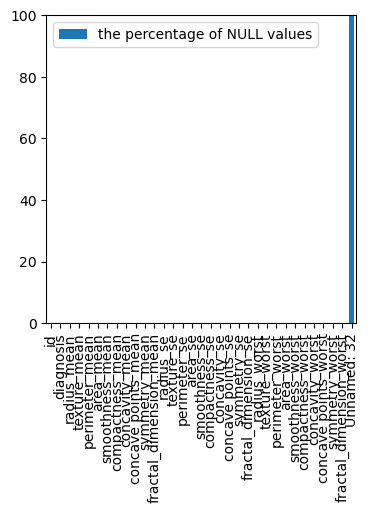

In [21]:
plt.figure( figsize=(4,4) )
percentage.plot( kind='bar',label='the percentage of NULL values' )
plt.ylim(0.0,100.0)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


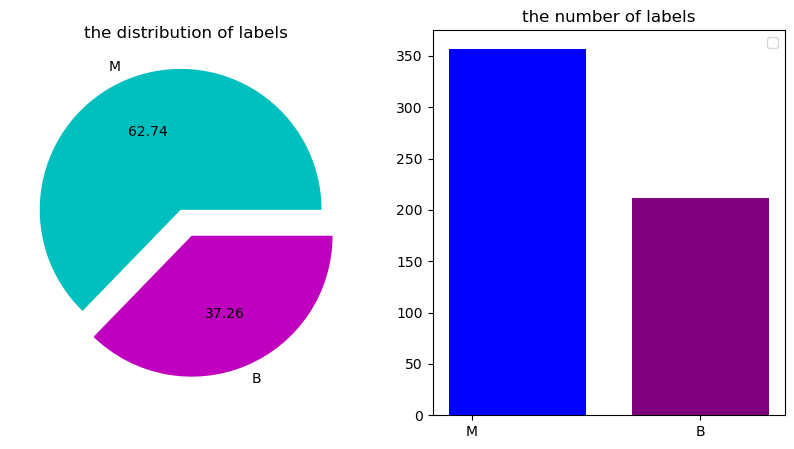

In [34]:
# to check the distribution of the diagnose feature
label = data[ 'diagnosis' ]
plt.figure( figsize=[10,5] )
plt.subplot(121)
plt.pie( x= label.value_counts(),labels=label.unique(),colors=['c','m'],explode=[0.1,0.1],autopct='%.2f' )
plt.title( 'the distribution of labels' )
plt.subplot(122)
plt.bar( x = [ 0.2,1 ],height =label.value_counts() ,width=0.6,color=['blue','purple'] )
plt.xticks( range(2),label.unique() )
plt.title( 'the number of labels' )
plt.legend()
plt.show()

In [35]:
# As you can see there are  columns, like "id" and "Unnamed: 32". Let's drop them. Also We need to change categorical data to numeric data.
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

In [36]:
# to visualize the distribution of different labels
B = data[ data['diagnosis']==1 ]
M = data[ data['diagnosis']==0 ]

In [37]:
def plot_distribution ( feature ):
    global B
    global M
    b = B[feature]
    m = M[feature]
    group_labels = ['benign','malignant']
    colors = ['#FFD700', '#7EC0EE']
    plt.figure( figsize=[4,4] )
    sns.distplot( b,color=colors[0],label=group_labels[0] )
    sns.distplot( m,color=colors[1],label=group_labels[1] )
    plt.title(feature)
    plt.legend(  )
    plt.show()

C:\Users\aasth\AppData\Local\Temp\ipykernel_24368\2048648237.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( b,color=colors[0],label=group_labels[0] )
C:\Users\aasth\AppData\Local\Temp\ipykernel_24368\2048648237.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( m,color=colors[1],label=g

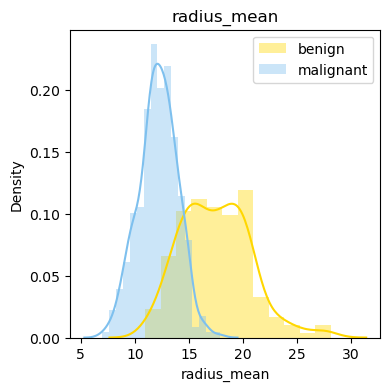

In [40]:
plot_distribution('radius_mean')

C:\Users\aasth\AppData\Local\Temp\ipykernel_24368\2048648237.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( b,color=colors[0],label=group_labels[0] )
C:\Users\aasth\AppData\Local\Temp\ipykernel_24368\2048648237.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( m,color=colors[1],label=g

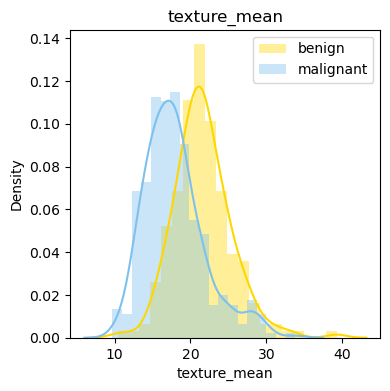

In [41]:
plot_distribution('texture_mean')

C:\Users\aasth\AppData\Local\Temp\ipykernel_24368\2048648237.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( b,color=colors[0],label=group_labels[0] )
C:\Users\aasth\AppData\Local\Temp\ipykernel_24368\2048648237.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( m,color=colors[1],label=g

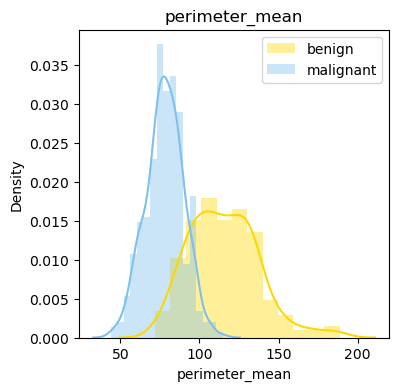

In [42]:
plot_distribution('perimeter_mean')

C:\Users\aasth\AppData\Local\Temp\ipykernel_24368\2048648237.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( b,color=colors[0],label=group_labels[0] )
C:\Users\aasth\AppData\Local\Temp\ipykernel_24368\2048648237.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( m,color=colors[1],label=g

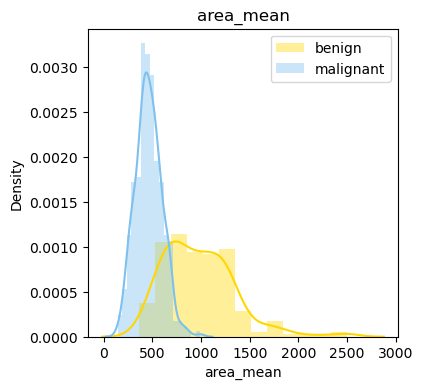

In [43]:
plot_distribution('area_mean')

<Axes: >

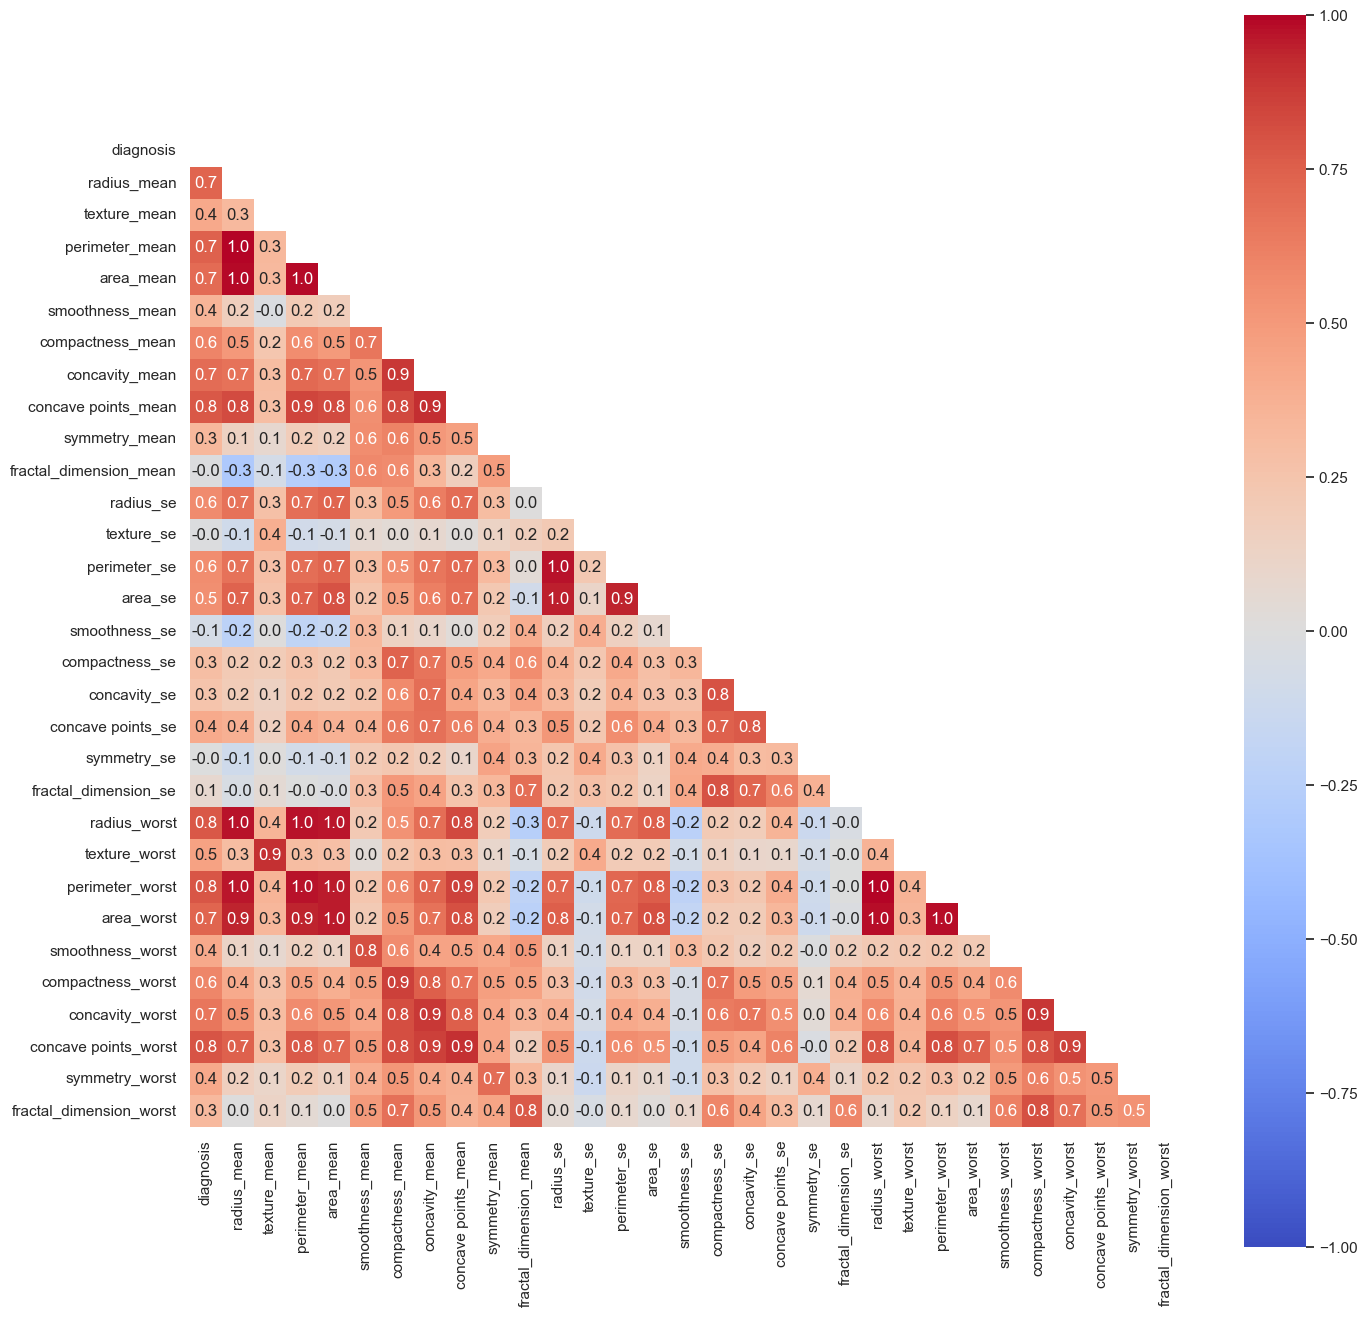

In [46]:
#correlation map
sns.set(style="white")
fig,ax=plt.subplots(figsize=(16,16))
corr=data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#heatmap
sns.heatmap(corr,vmin=-1,vmax=1,fmt = ".1f",annot=True,cmap="coolwarm", mask=mask, square=True)

In [47]:
# Dropping variables due to high correaltion between variables.
data=data.drop(['area_mean', 'perimeter_mean', 'radius_worst', 'area_worst', 'perimeter_worst','texture_worst','concavity_mean','perimeter_se', 'area_se'],axis=1)

In [51]:
# Seperating dependant and indepedant variables

x_data = data.drop(['diagnosis'], axis=1)
y = data.diagnosis.values

In [52]:
# Train and test split
x_train, x_test, y_train, y_test = train_test_split(x_data,y, test_size = 0.3, random_state = 1)

In [53]:
# to normalize the dataset with standardscale
conv = StandardScaler()
std_data = conv.fit_transform( x_data )


In [54]:
# use PCA to reduce dimensionality
pca = PCA(n_components=20,svd_solver='full')
transformed_data = pca.fit_transform( std_data )
print( transformed_data.shape )
print( pca.explained_variance_ratio_*100 )
print( pca.explained_variance_ )

(569, 20)
[42.76227616 14.80379751 11.35658852  7.38136622  5.79258429  5.30672997
  2.40097447  2.0716612   1.69139953  1.32142051  1.25621846  0.94508678
  0.88873469  0.68962045  0.37241013  0.27262518  0.22980964  0.16153349
  0.12372473  0.10236587]
[8.99588799 3.11427071 2.38908233 1.55281593 1.21858432 1.11637529
 0.50509232 0.43581478 0.35581924 0.27798686 0.26427032 0.19881764
 0.18696287 0.14507526 0.07834381 0.05735208 0.04834499 0.03398176
 0.02602794 0.02153468]


In [55]:
threshold = 0.80
for_test = 0
order = 0
for index,ratio in  enumerate (pca.explained_variance_ratio_):
    if threshold>for_test:
        for_test+= ratio
    else:
        order = index + 1
        break

The first 6 features could represent 85 percents of the viarance
0.8740334267440906


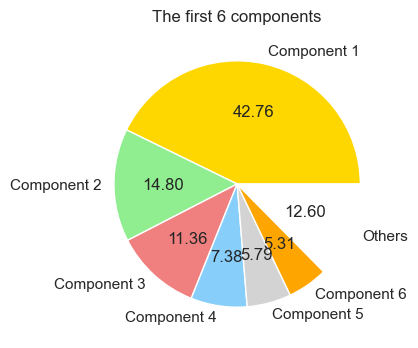

In [62]:
print( 'The first %d features could represent 85 percents of the viarance' % order )
print( pca.explained_variance_ratio_[:order].sum() )
com_col = [ 'Component '+ str(i+1) for i in range(order) ]
com_col.append('Others')
com_value = [ i for i in pca.explained_variance_ratio_[:order] ]
com_value.append( 1-pca.explained_variance_ratio_[:order].sum() )
com_colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white']
plt.figure( figsize=[4,4] )
plt.pie( x=com_value,labels=com_col,colors=com_colors,autopct='%.2f' )
plt.title( 'The first 6 components' )
plt.show()

In [104]:
def plot_confusion_matrix (  label,pred,classes = [0,1] ,cmap = plt.cm.Blues,title='Confusion Matrix' ):
    con_m = confusion_matrix( label,pred )
    plt.imshow( con_m,interpolation = 'Nearest',cmap=cmap )
    plt.title(title)
    plt.colorbar()
    thres = con_m.max() / 2
    for j in range( con_m.shape[0] ):
        for i in range( con_m.shape[1] ):
            plt.text( i,j,con_m[j,i],
                      horizontalalignment = 'center',
                      color='white' if con_m[i,j]>thres else 'black')

    plt.ylabel( 'True label' )
    plt.xlabel( 'Predicted label' )
    plt.xticks(  classes,classes )
    plt.yticks(  classes,classes )
    plt.tight_layout()


In [105]:
def print_matrix(  label,pred ):
    tn, fp, fn, tp = confusion_matrix( label,pred ).ravel()
    print( 'Accuracy rate = %.2f' %(( tp+tn )/( tn+fp+fn+tp )) )
    print('Precision rate = %.2f' % ((tp ) / (fp + tp)))
    print('Recall rate = %.2f' % ((tp ) / (fn + tp)))
    print('F1 score = %.2f' % ( 2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn)))) ))


In [106]:
def plot_ROC( label,pred ):
    from sklearn.metrics import roc_curve
    fpr, tpr,t = roc_curve( label,pred )
    plt.plot(fpr, tpr, label='ROC curve', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ')
    print( 'The threshold is ', t )
    plt.show()

In [107]:
def plot_learning_curve( estimator,title,x,y,train_sizes = np.linspace(.1, 1.0, 5),n_job = 1 ):
    plt.figure( figsize=[4,4] )
    plt.title(title)
    plt.xlabel( 'Training examples' )
    plt.ylabel( 'Score' )

    train_size,train_score,test_score = learning_curve(estimator,x,y,n_jobs=n_job,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_score, axis = 1)
    train_scores_std = np.std(train_score, axis = 1)
    test_scores_mean = np.mean(test_score, axis = 1)
    test_scores_std = np.std(test_score, axis = 1)
    plt.grid()
    plt.fill_between(train_size, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_size, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_size, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_size, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "Best")
    return plt

In [108]:
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size = 0.12, random_state = random_seed)
logistic_reg = LogisticRegression( random_state=random_seed )
para_grid = {
            'penalty':['l1','l2'],
            'C':[0.001,0.01,0.1,1.0,10,100,1000]
            }
CV_log_reg = GridSearchCV( estimator=logistic_reg,param_grid=para_grid,n_jobs=-1 )
CV_log_reg.fit( X_train,y_train )
best_para = CV_log_reg.best_params_
print( 'The best parameters are ',best_para )

The best parameters are  {'C': 1.0, 'penalty': 'l2'}


C:\Users\aasth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aasth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aasth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aasth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Value

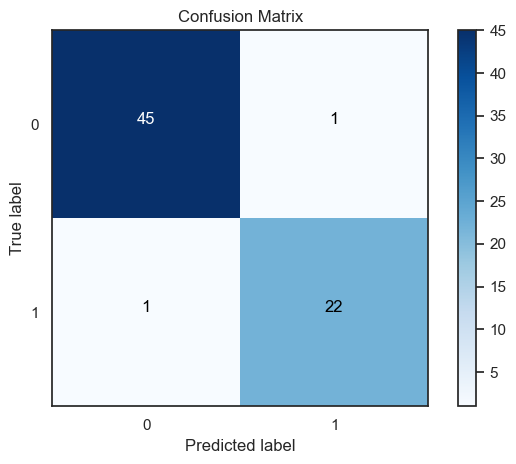

Accuracy rate = 0.97
Precision rate = 0.96
Recall rate = 0.96
F1 score = 0.96
The threshold is  [2 1 0]


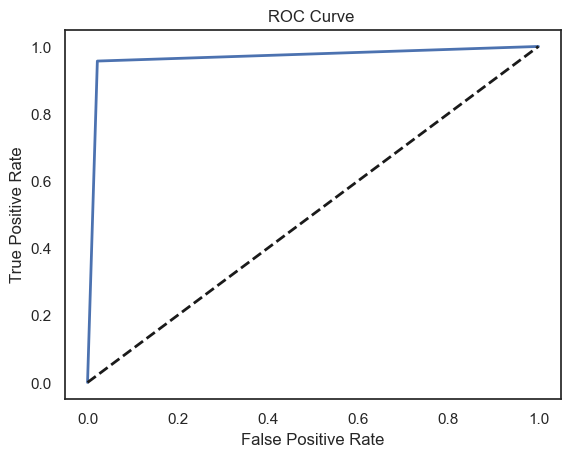

In [109]:

# now using the best parameters to log the regression model
logistic_reg = LogisticRegression( C=best_para['C'],penalty=best_para['penalty'],random_state=random_seed )
logistic_reg.fit( X_train,y_train )
y_pred = logistic_reg.predict( X_test )

plot_confusion_matrix( y_test,y_pred )
plt.show( )
print_matrix(y_test,y_pred)
plot_ROC(y_test,y_pred)
plt.show( )